--- STARTING PAPER VALIDATION: GMM vs. STATIC SECTORS ---
Matched 36306 rows for validation.
Comparing GMM Clusters vs. Static Label: 'Sector'
-> Heatmap saved to '5. PAPER_SECTOR_HEATMAP.png'

--- STATISTICAL VALIDATION METRICS ---
NMI Score: 0.1349 (Ideal: 0.3 - 0.6)
ARI Score: 0.0488  (Ideal: > 0.1)
Interpretation: A moderate score proves your clusters are NOT random,
but distinct enough to add new value beyond static labels.

--- DISCOVERY: IDENTIFYING CROSS-SECTOR BEHAVIORS ---
CASE STUDY: Cluster 0.0
This cluster contains companies from 22 different sectors!
Top 5 Sectors in this Cluster:
Sector
Healthcare                    333
Chemicals                     309
Capital Goods                 303
Fast Moving Consumer Goods    177
Consumer Services             159
Name: count, dtype: int64
-> Detailed Validation Report saved to '5. PAPER_VALIDATION_REPORT.csv'


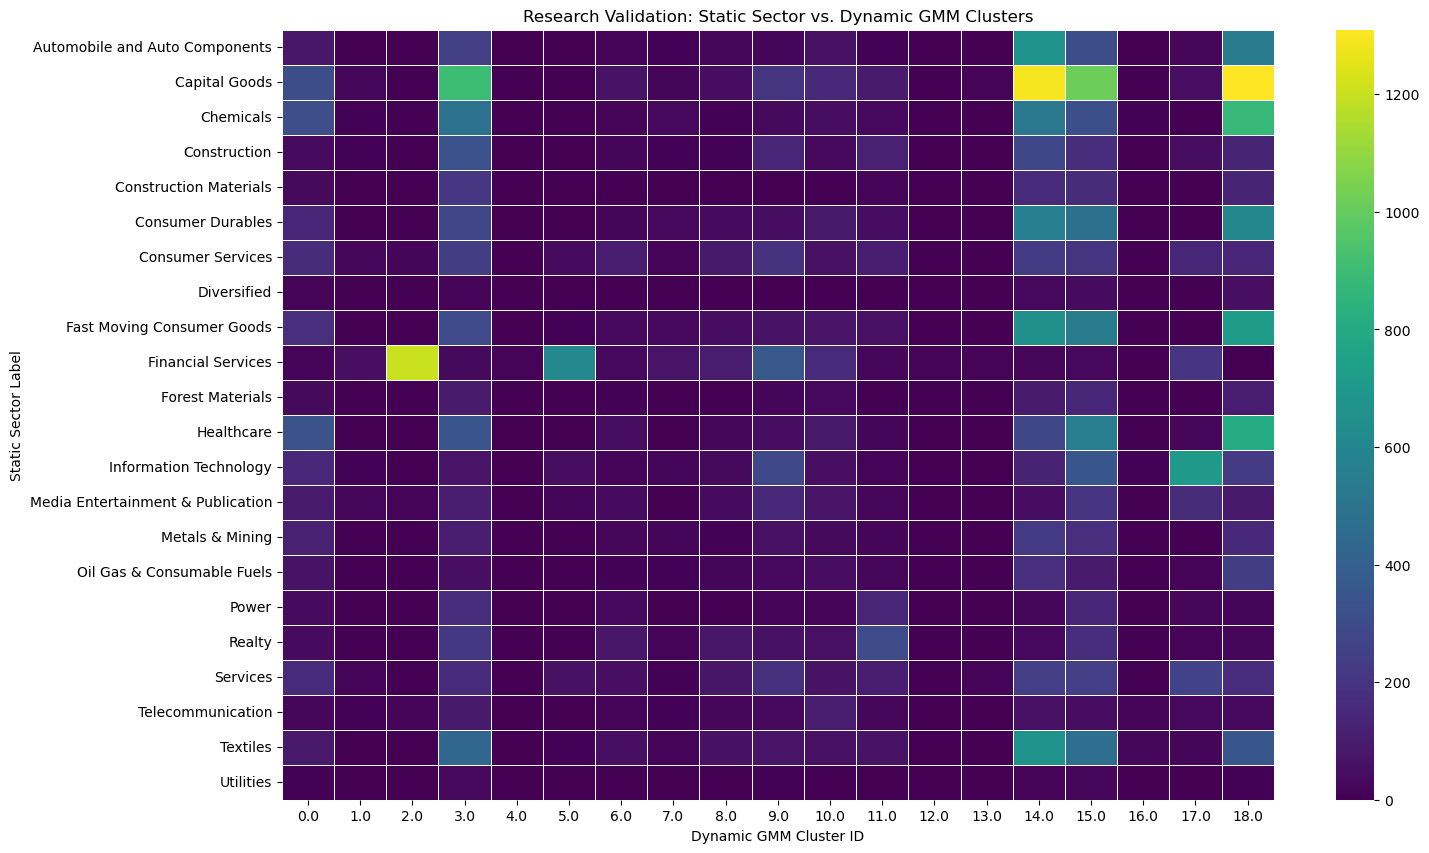

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

# =============================================================================
# CONFIGURATION
# =============================================================================
CLUSTER_FILE = '3. O_CLUSTERED_DATA.csv'
SECTOR_FILE = '0.SECTOR_METADATA.csv' # The file from your image (20MICRONS, etc.)

# Which column from the static file do you want to compare against?
# Options from your image: 'Macro', 'Sector', 'Industry', 'BasicIndustry'
STATIC_LABEL_COL = 'Sector' 

print("--- STARTING PAPER VALIDATION: GMM vs. STATIC SECTORS ---")

# 1. LOAD AND MERGE
try:
    df_clusters = pd.read_csv(CLUSTER_FILE)
    df_sectors = pd.read_csv(SECTOR_FILE)
    
    # Merge on 'company'
    # We use inner join to only analyze companies where we have BOTH data points
    merged_df = pd.merge(df_clusters, df_sectors, on='company', how='inner')
    
    print(f"Matched {len(merged_df)} rows for validation.")
    print(f"Comparing GMM Clusters vs. Static Label: '{STATIC_LABEL_COL}'")
    
except FileNotFoundError:
    print("Error: Files not found. Make sure CSVs exist.")
    exit()

# =============================================================================
# ANALYSIS 1: THE HEATMAP (Visual Proof)
# =============================================================================
# We create a Contingency Table: Rows = Sectors, Cols = Clusters
crosstab = pd.crosstab(merged_df[STATIC_LABEL_COL], merged_df['Cluster_ID'])

# Plotting
plt.figure(figsize=(16, 10))
sns.heatmap(crosstab, cmap='viridis', annot=False, linewidths=0.5)
plt.title(f'Research Validation: Static {STATIC_LABEL_COL} vs. Dynamic GMM Clusters')
plt.ylabel('Static Sector Label')
plt.xlabel('Dynamic GMM Cluster ID')
plt.savefig('5. PAPER_SECTOR_HEATMAP.png')
print("-> Heatmap saved to '5. PAPER_SECTOR_HEATMAP.png'")

# =============================================================================
# ANALYSIS 2: QUANTITATIVE METRICS (Statistical Proof)
# =============================================================================
# We use NMI (Normalized Mutual Information).
# NMI = 1.0 -> Perfect Correlation (Clusters are identical to Sectors)
# NMI = 0.0 -> Random Noise
# Target for your Paper: 0.3 to 0.6.
# Why? It shows "Relation" (Validation) but also "Divergence" (Discovery).

nmi = normalized_mutual_info_score(merged_df[STATIC_LABEL_COL], merged_df['Cluster_ID'])
ari = adjusted_rand_score(merged_df[STATIC_LABEL_COL], merged_df['Cluster_ID'])

print("\n--- STATISTICAL VALIDATION METRICS ---")
print(f"NMI Score: {nmi:.4f} (Ideal: 0.3 - 0.6)")
print(f"ARI Score: {ari:.4f}  (Ideal: > 0.1)")
print("Interpretation: A moderate score proves your clusters are NOT random,")
print("but distinct enough to add new value beyond static labels.")

# =============================================================================
# ANALYSIS 3: THE "CROSS-SECTOR" DISCOVERY (The Case Study)
# =============================================================================
# We want to find a Cluster that contains a MIX of sectors.
# This proves that "Financial Behavior" crosses "Sector Boundaries".

print("\n--- DISCOVERY: IDENTIFYING CROSS-SECTOR BEHAVIORS ---")

# Find the cluster with the highest diversity of sectors
diversity_score = merged_df.groupby('Cluster_ID')[STATIC_LABEL_COL].nunique()
most_diverse_cluster = diversity_score.idxmax()
sector_counts = merged_df[merged_df['Cluster_ID'] == most_diverse_cluster][STATIC_LABEL_COL].value_counts()

print(f"CASE STUDY: Cluster {most_diverse_cluster}")
print(f"This cluster contains companies from {diversity_score.max()} different sectors!")
print("Top 5 Sectors in this Cluster:")
print(sector_counts.head(5))

# Save the detailed breakdown for the paper
diversity_report = merged_df.groupby(['Cluster_ID', STATIC_LABEL_COL]).size().reset_index(name='Count')
diversity_report.to_csv('5. PAPER_VALIDATION_REPORT.csv', index=False)
print("-> Detailed Validation Report saved to '5. PAPER_VALIDATION_REPORT.csv'")

--- STARTING VALIDATION: GMM CLUSTERS VS Industry ---
Matched 36306 companies for validation.
-> Saved Raw Counts to '5. VALIDATION_RAW_COUNTS.csv'
-> Saved Percentages to '5. VALIDATION_PERCENTAGE.csv'
-> Heatmap saved to '5. VALIDATION_HEATMAP.png'

--- AUTOMATED FINDINGS FOR YOUR PAPER ---
• VALIDATION: Aerospace & Defense is strongly associated with Cluster 3.0 (46.8% match).
• DISCOVERY:  Agricultural Commercial & Construction Vehicles is FRAGMENTED. It behaves like multiple different financial entities.
• DISCOVERY:  Agricultural Food & other Products is FRAGMENTED. It behaves like multiple different financial entities.
• VALIDATION: Auto Components is strongly associated with Cluster 14.0 (35.0% match).
• VALIDATION: Automobiles is strongly associated with Cluster 18.0 (33.1% match).
• VALIDATION: Beverages is strongly associated with Cluster 14.0 (40.2% match).
• VALIDATION: Capital Markets is strongly associated with Cluster 2.0 (35.3% match).
• VALIDATION: Cement & Cement Pro

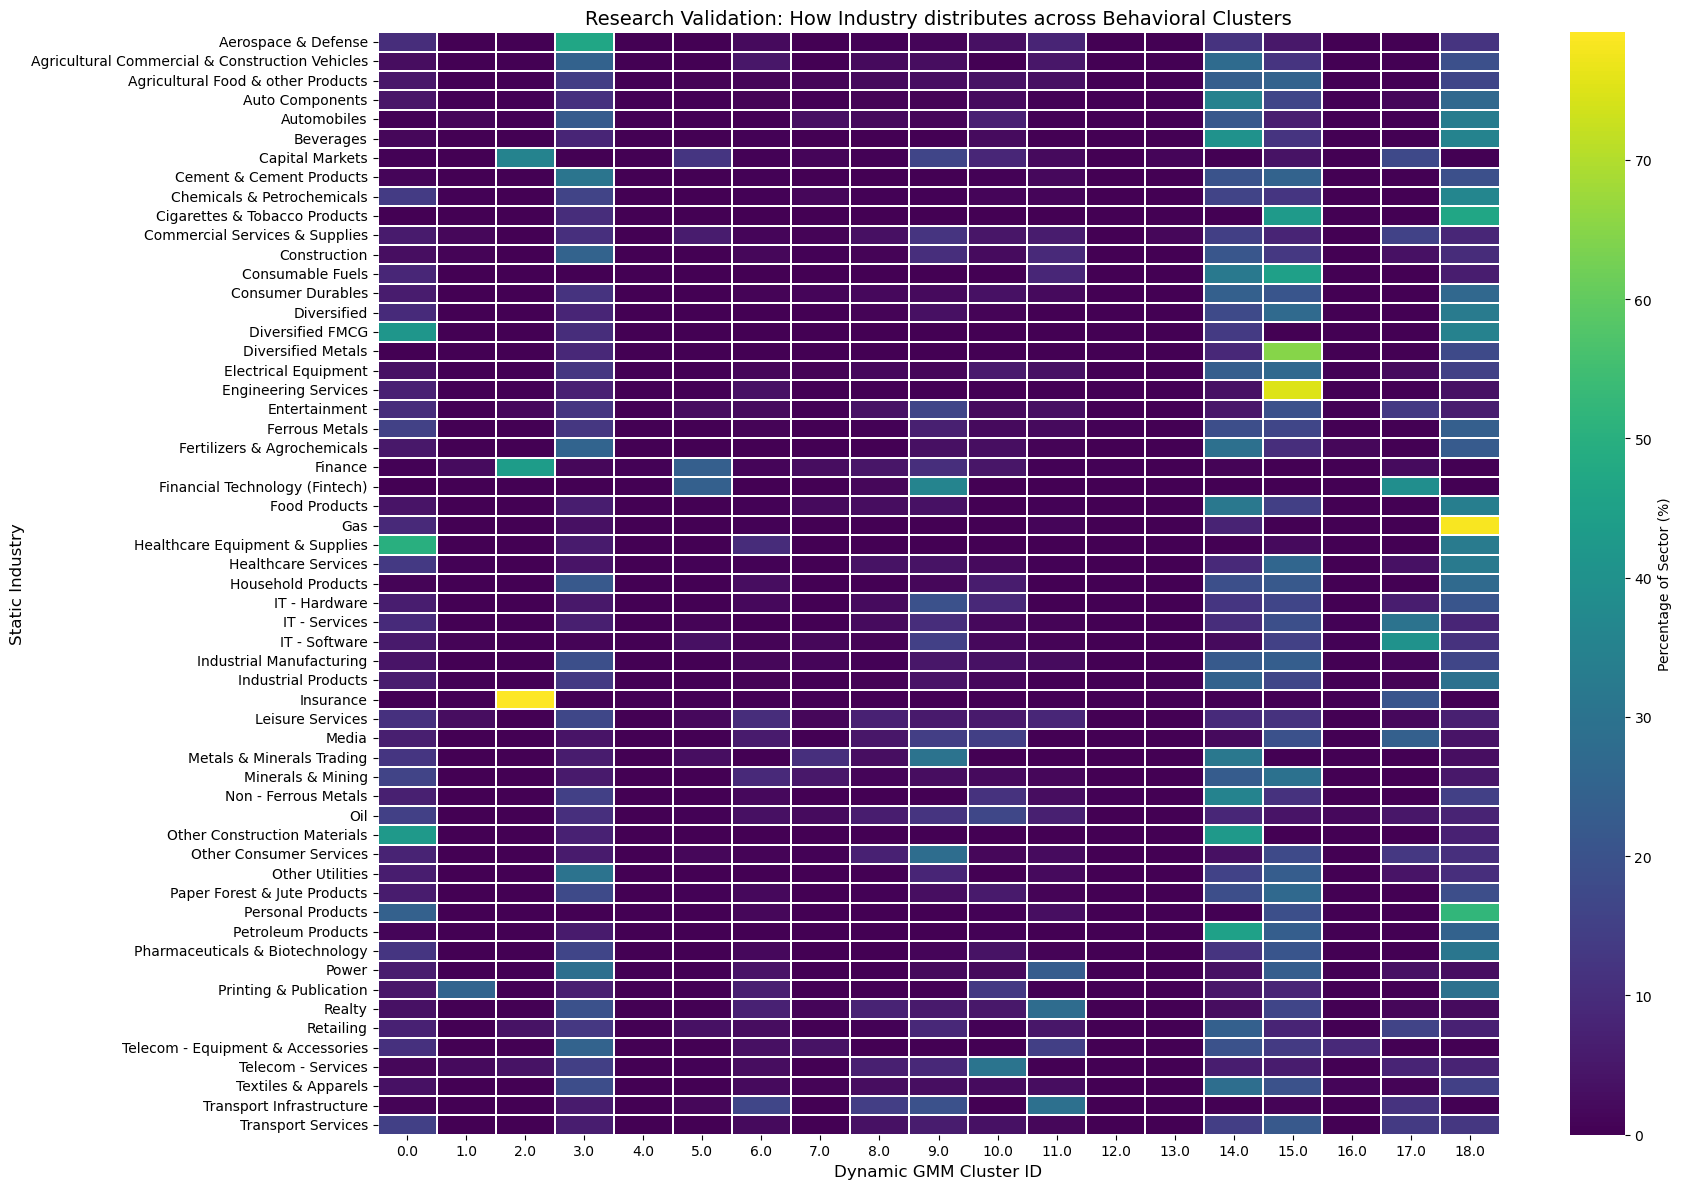

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# =============================================================================
# CONFIGURATION
# =============================================================================
CLUSTER_FILE = '3. O_CLUSTERED_DATA.csv'
SECTOR_FILE = '0.SECTOR_METADATA.csv' # Your sector file (Company, Macro, Sector...)

# Choose the column to validate against (from your image)
# Options: 'Macro', 'Sector', 'Industry', 'BasicIndustry'
TARGET_LABEL = 'Industry' 

print(f"--- STARTING VALIDATION: GMM CLUSTERS VS {TARGET_LABEL} ---")

# 1. LOAD DATA
try:
    df_clusters = pd.read_csv(CLUSTER_FILE)
    df_sectors = pd.read_csv(SECTOR_FILE)
    
    # Merge on 'company'
    merged_df = pd.merge(df_clusters, df_sectors, on='company', how='inner')
    print(f"Matched {len(merged_df)} companies for validation.")
    
except FileNotFoundError:
    print("Error: Files not found. Check CSV paths.")
    exit()

# =============================================================================
# OUTPUT 1: RAW COUNTS (Matches your Image)
# =============================================================================
# Rows = Static Industry, Columns = Dynamic Cluster ID
raw_matrix = pd.crosstab(merged_df[TARGET_LABEL], merged_df['Cluster_ID'])

# Save to CSV
raw_matrix.to_csv('5. VALIDATION_RAW_COUNTS.csv')
print("-> Saved Raw Counts to '5. VALIDATION_RAW_COUNTS.csv'")

# =============================================================================
# OUTPUT 2: THE "BETTER WAY" (Percentage Heatmap)
# =============================================================================
# We normalize by Row (index). This shows:
# "Out of all Finance companies, what % went to Cluster X?"
norm_matrix = pd.crosstab(merged_df[TARGET_LABEL], merged_df['Cluster_ID'], normalize='index') * 100

# Save to CSV
norm_matrix.to_csv('5. VALIDATION_PERCENTAGE.csv')
print("-> Saved Percentages to '5. VALIDATION_PERCENTAGE.csv'")

# =============================================================================
# VISUALIZATION (For the Paper)
# =============================================================================
plt.figure(figsize=(18, 12))

# Use the Percentage Matrix for the visual (it's cleaner)
sns.heatmap(norm_matrix, cmap='viridis', annot=False, linewidths=0.05, cbar_kws={'label': 'Percentage of Sector (%)'})

plt.title(f'Research Validation: How {TARGET_LABEL} distributes across Behavioral Clusters', fontsize=14)
plt.ylabel(f'Static {TARGET_LABEL}', fontsize=12)
plt.xlabel('Dynamic GMM Cluster ID', fontsize=12)
plt.tight_layout()

plt.savefig('5. VALIDATION_HEATMAP.png', dpi=300)
print("-> Heatmap saved to '5. VALIDATION_HEATMAP.png'")

# =============================================================================
# AUTOMATED INSIGHT GENERATOR
# =============================================================================
print("\n--- AUTOMATED FINDINGS FOR YOUR PAPER ---")

# Find the "Dominant Cluster" for each Industry
for industry in norm_matrix.index:
    # Get the cluster with the highest percentage for this industry
    top_cluster = norm_matrix.loc[industry].idxmax()
    percentage = norm_matrix.loc[industry, top_cluster]
    
    # Only report significant findings (>30% concentration)
    if percentage > 30:
        print(f"• VALIDATION: {industry} is strongly associated with Cluster {top_cluster} ({percentage:.1f}% match).")
    else:
        print(f"• DISCOVERY:  {industry} is FRAGMENTED. It behaves like multiple different financial entities.")

In [4]:
import pandas as pd
import numpy as np

# Load your clustered data
df = pd.read_csv('3. O_CLUSTERED_DATA.csv')

print("--- GENERATING COMPANY DNA PROFILES ---")

# 1. Count how many quarters each company spent in each cluster
# Pivot Table: Rows = Company, Cols = Cluster_ID, Values = Count of Quarters
dna_profile = pd.crosstab(df['company'], df['Cluster_ID'], normalize='index') * 100

# 2. Find the "Dominant Personality"
# Which cluster does the company spend most of its time in?
dna_profile['Dominant_Cluster'] = dna_profile.idxmax(axis=1)
dna_profile['Dominant_Pct'] = dna_profile.max(axis=1)

# 3. Calculate "Stability Score"
# If a company is 100% in Cluster 5, it is Very Stable.
# If it is 20% in five different clusters, it is Volatile (or a Conglomerate).
# We interpret 'Dominant_Pct' as the Stability Score.

# 4. Filter for Interesting Cases (Hybrids)
# Show companies that are NOT stable (Dominant Pct < 60%)
hybrids = dna_profile[dna_profile['Dominant_Pct'] < 60].sort_values('Dominant_Pct')

print(f"Total Companies: {len(dna_profile)}")
print(f"Stable Companies (>80% in one cluster): {len(dna_profile[dna_profile['Dominant_Pct'] > 80])}")
print(f"Hybrid/Volatile Companies (<60% in one cluster): {len(hybrids)}")

# 5. Save
dna_profile.to_csv('6. COMPANY_DNA_PROFILE.csv')
print("-> Saved Company DNA to '6. COMPANY_DNA_PROFILE.csv'")

# 6. Show Reliance Example (if it exists in your data)
target = 'RELIANCE' # Or 'REL' or whatever the code is
if target in dna_profile.index:
    print(f"\n--- DNA PROFILE FOR {target} ---")
    print(dna_profile.loc[target][dna_profile.loc[target] > 0])
else:
    print("\n(Check the file for specific companies like Reliance)")
    print("Top 5 Hybrid Companies (The 'Shape Shifters'):")
    print(hybrids[['Dominant_Cluster', 'Dominant_Pct']].head(5))

--- GENERATING COMPANY DNA PROFILES ---
Total Companies: 2026
Stable Companies (>80% in one cluster): 962
Hybrid/Volatile Companies (<60% in one cluster): 482
-> Saved Company DNA to '6. COMPANY_DNA_PROFILE.csv'

--- DNA PROFILE FOR RELIANCE ---
Cluster_ID
3.0                 32.0
14.0                44.0
15.0                 4.0
18.0                20.0
Dominant_Cluster    14.0
Dominant_Pct        44.0
Name: RELIANCE, dtype: float64


--- STARTING CLUSTER TAXONOMY GENERATOR ---

--- PROPOSED CLUSTER NAMES (For your Paper) ---
           Final_Name  ilr_Activity  ilr_Profitability  ilr_Solvency  \
Cluster_ID                                                             
0.0               NaN     -0.539642           0.096482      1.272679   
1.0               NaN     -9.927884          -9.860966     -0.912601   
2.0               NaN     -2.085020           0.196319      0.621134   
3.0               NaN     -0.916052           0.012074      0.425549   
4.0               NaN      7.108843           0.725190    -12.147700   
5.0               NaN     -2.849288           0.788732      1.801451   
6.0               NaN     -1.214668          -0.122767      0.739129   
7.0               NaN    -12.018572          -9.839548      1.173850   
8.0               NaN     -4.028955          -1.369163      0.406028   
9.0               NaN     -1.648383          -0.108466      0.806694   
10.0              NaN     -1.813785        

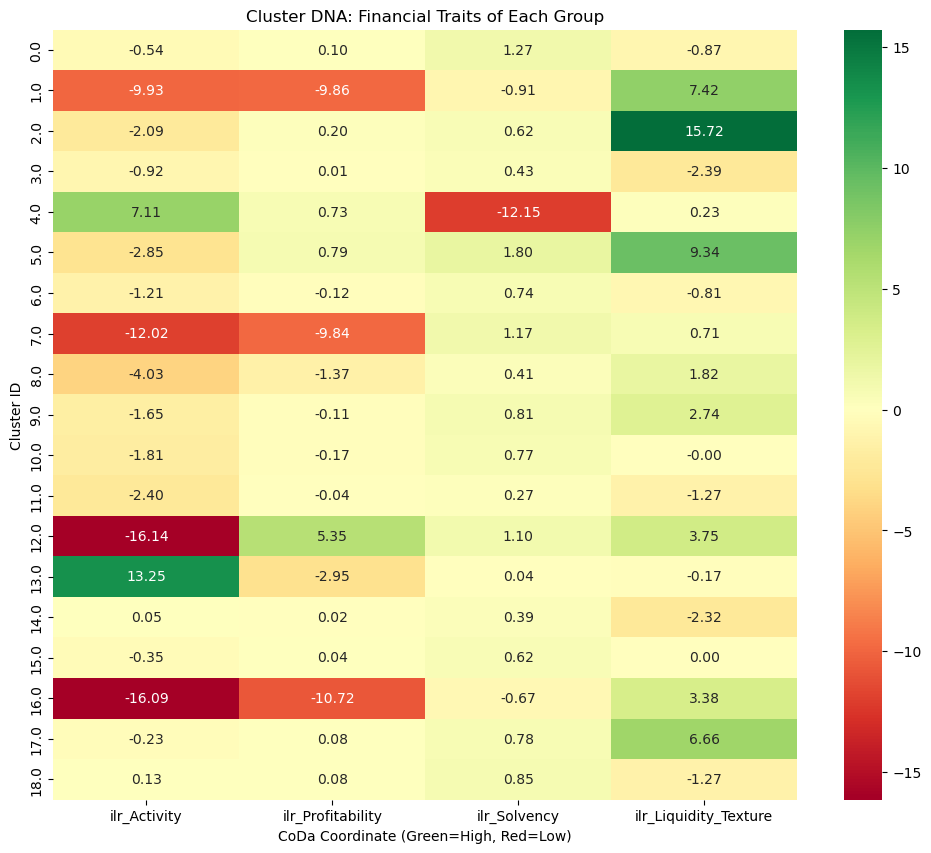

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# =============================================================================
# CONFIGURATION
# =============================================================================
CLUSTER_FILE = '3. O_CLUSTERED_DATA.csv'
SECTOR_FILE = '5. VALIDATION_PERCENTAGE.csv' # Created in previous step (optional)

# The 4 DNA Strands
FEATURES = ['ilr_Activity', 'ilr_Profitability', 'ilr_Solvency', 'ilr_Liquidity_Texture']

print("--- STARTING CLUSTER TAXONOMY GENERATOR ---")

# 1. LOAD DATA
df = pd.read_csv(CLUSTER_FILE)

# 2. CALCULATE CLUSTER CENTROIDS (The "Average Personality")
centroids = df.groupby('Cluster_ID')[FEATURES].mean()

# 3. INTERPRETATION FUNCTION (Translating Math to English)
def interpret_cluster(row):
    name_parts = []
    
    # =========================================================
    # 1. SOLVENCY (Debt vs Safe)
    # =========================================================
    if row['ilr_Solvency'] > 1.0: 
        name_parts.append("Ultra-Safe")
    elif row['ilr_Solvency'] < -0.5:
        # TIE-BREAKER: Distinguish "High Debt" (Cluster 1) from "Extreme" (Cluster 16)
        if row['ilr_Activity'] < -12.0:
            name_parts.append("Structurally-Collapsed") # Cluster 16
        else:
            name_parts.append("High-Debt") # Cluster 1

    # =========================================================
    # 2. PROFITABILITY (Margins)
    # =========================================================
    if row['ilr_Profitability'] > 0.1: 
        # TIE-BREAKER: Distinguish Normal Profit (Cluster 5) from Investment/Holding (Cluster 12)
        if row['ilr_Profitability'] > 4.0:
            name_parts.append("Investment-Grade-Yield") # Cluster 12
        else:
            name_parts.append("High-Margin") # Cluster 5
            
    elif row['ilr_Profitability'] < -0.1:
        # TIE-BREAKER: Distinguish Deep Loss (Cluster 8) from Marginal Loss (Cluster 9/6/10)
        if row['ilr_Profitability'] < -1.0:
            name_parts.append("Deep-Loss-Making") # Cluster 8
        else:
            name_parts.append("Loss-Making") 

    # =========================================================
    # 3. ACTIVITY (Turnover/Velocity)
    # =========================================================
    # TIE-BREAKER: This fixes the "Loss-Making" duplicates (Cluster 13 vs 6 vs 10)
    if row['ilr_Activity'] > 10.0:
        name_parts.append("High-Velocity") # Cluster 13 (The fast mover)
    elif row['ilr_Activity'] < -2.0:
        # Only add if not already covered by "Collapsed" or "Investment"
        if "Collapsed" not in str(name_parts) and "Investment" not in str(name_parts):
            name_parts.append("Asset-Heavy") # Cluster 11

    # =========================================================
    # 4. LIQUIDITY (Cash vs Inventory)
    # =========================================================
    if row['ilr_Liquidity_Texture'] > 1.0: 
        name_parts.append("Cash-Rich")
        
    elif row['ilr_Liquidity_Texture'] < -2.0:
        # TIE-BREAKER: Distinguish Inventory Types (Cluster 3 vs 14)
        if row['ilr_Activity'] < -0.5:
            name_parts.append("Stagnant-Inventory") # Cluster 3 (Slow Moving)
        else:
            name_parts.append("Active-Inventory-Trading") # Cluster 14 (Fast Moving)

    # =========================================================
    # 5. FALLBACK / REFINEMENT (The "Average" Firms)
    # =========================================================
    current_name = " ".join(name_parts)
    
    if not current_name or current_name == "Asset-Heavy":
        # Distinguish the "Balanced" group (Cluster 11 vs 15 vs 18)
        if row['ilr_Activity'] < -2.0:
            return "Asset-Heavy Holding Firm" # Cluster 11
        elif row['ilr_Liquidity_Texture'] < -1.0:
            return "Liquidity-Stressed Average Firm" # Cluster 18
        else:
            return "Balanced/Average Firm" # Cluster 15
            
    # Refine "Loss-Making" duplicates (Cluster 6 vs 10) if they are still identical
    if current_name == "Loss-Making":
        if row['ilr_Liquidity_Texture'] < -0.5:
            return "Liquidity-Stressed Loss-Maker" # Cluster 6
        else:
            return "Pure Loss-Maker" # Cluster 10

    return current_name

# Apply interpretation
centroids['Auto_Label'] = centroids.apply(interpret_cluster, axis=1)

# 4. MERGE WITH SECTOR DATA (If available)
# This adds context like " (Mostly IT)"
try:
    sector_df = pd.read_csv(SECTOR_FILE, index_col=0)
    # Find column with max % for each cluster
    centroids['Dominant_Sector'] = sector_df.idxmax(axis=0)
    centroids['Sector_Pct'] = sector_df.max(axis=0)
    
    # Combine Logic
    centroids['Final_Name'] = centroids['Auto_Label'] + " (" + \
                              centroids['Dominant_Sector'] + " - " + \
                              centroids['Sector_Pct'].round(0).astype(str) + "%)"
except:
    print("Warning: Sector file not found. Using Financial Labels only.")
    centroids['Final_Name'] = centroids['Auto_Label']

# 5. DISPLAY & SAVE
print("\n--- PROPOSED CLUSTER NAMES (For your Paper) ---")
display_cols = ['Final_Name'] + FEATURES
print(centroids[display_cols])

centroids.to_csv('6. CLUSTER_TAXONOMY.csv')
print("\n-> Saved Taxonomy to '6. CLUSTER_TAXONOMY.csv'")

# 6. VISUALIZE THE "DNA" (Heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(centroids[FEATURES], cmap='RdYlGn', center=0, annot=True, fmt='.2f')
plt.title('Cluster DNA: Financial Traits of Each Group')
plt.ylabel('Cluster ID')
plt.xlabel('CoDa Coordinate (Green=High, Red=Low)')
plt.savefig('6. CLUSTER_DNA_HEATMAP.png')
print("-> Saved DNA Heatmap to '6. CLUSTER_DNA_HEATMAP.png'")

--- STARTING CLUSTER TAXONOMY GENERATOR ---

--- PROPOSED CLUSTER NAMES (For your Paper) ---
           Final_Name  ilr_Activity  ilr_Profitability  ilr_Solvency  \
Cluster_ID                                                             
0.0               NaN     -0.539642           0.096482      1.272679   
1.0               NaN     -9.927884          -9.860966     -0.912601   
2.0               NaN     -2.085020           0.196319      0.621134   
3.0               NaN     -0.916052           0.012074      0.425549   
4.0               NaN      7.108843           0.725190    -12.147700   
5.0               NaN     -2.849288           0.788732      1.801451   
6.0               NaN     -1.214668          -0.122767      0.739129   
7.0               NaN    -12.018572          -9.839548      1.173850   
8.0               NaN     -4.028955          -1.369163      0.406028   
9.0               NaN     -1.648383          -0.108466      0.806694   
10.0              NaN     -1.813785        

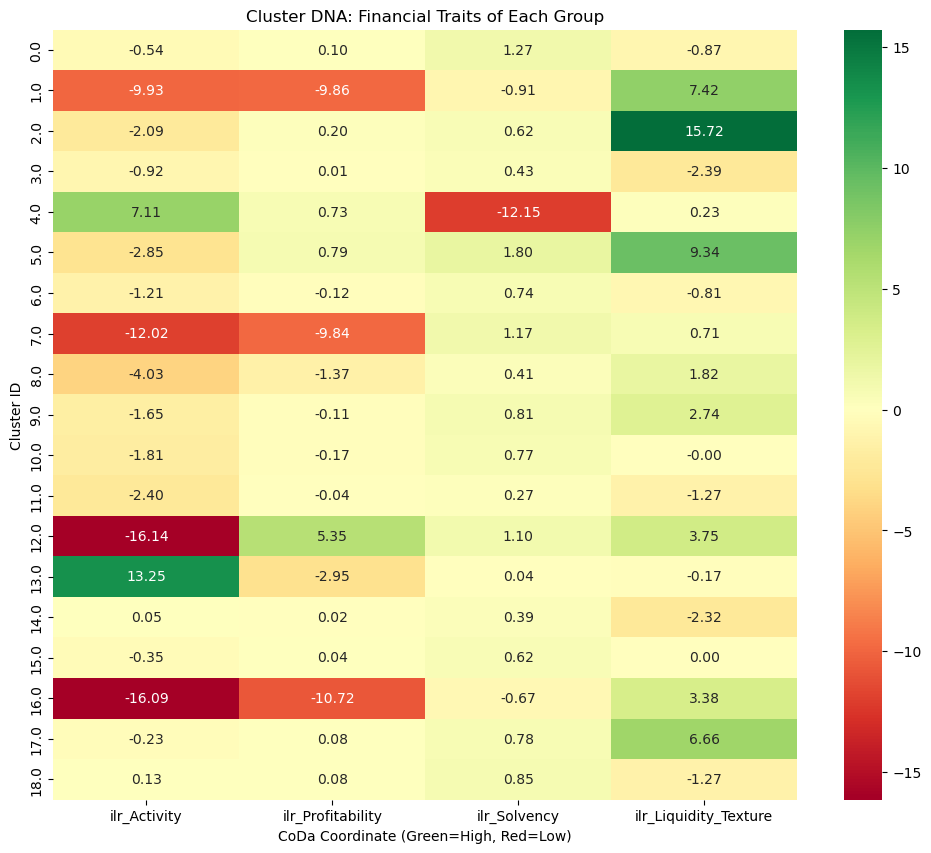

In [5]:
#OLD CODE DO  NOT RUN

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# =============================================================================
# CONFIGURATION
# =============================================================================
CLUSTER_FILE = '3. O_CLUSTERED_DATA.csv'
SECTOR_FILE = '5. VALIDATION_PERCENTAGE.csv' # Created in previous step (optional)

# The 4 DNA Strands
FEATURES = ['ilr_Activity', 'ilr_Profitability', 'ilr_Solvency', 'ilr_Liquidity_Texture']

print("--- STARTING CLUSTER TAXONOMY GENERATOR ---")

# 1. LOAD DATA
df = pd.read_csv(CLUSTER_FILE)

# 2. CALCULATE CLUSTER CENTROIDS (The "Average Personality")
centroids = df.groupby('Cluster_ID')[FEATURES].mean()

# 3. INTERPRETATION FUNCTION (Translating Math to English)
def interpret_cluster(row):
    name_parts = []
    
    # A. SOLVENCY (Assets vs Liabilities)
    # High (+): Safe, Asset Heavy. Low (-): High Debt, Leveraged.
    if row['ilr_Solvency'] > 1.0: name_parts.append("Ultra-Safe")
    elif row['ilr_Solvency'] < -0.5: name_parts.append("High-Debt")
    
    # B. PROFITABILITY (Rev vs Exp)
    # High (+): Profitable. Low (-): Loss Making.
    if row['ilr_Profitability'] > 0.1: name_parts.append("High-Margin")
    elif row['ilr_Profitability'] < -0.1: name_parts.append("Loss-Making")
    
    # C. ACTIVITY (Flow vs Stock)
    # High (+): Trading/Service (High turnover). Low (-): Holding/Infra (Slow assets).
    if row['ilr_Activity'] > 1.0: name_parts.append("High-Velocity")
    elif row['ilr_Activity'] < -1.0: name_parts.append("Asset-Heavy")
    
    # D. LIQUIDITY (Cash vs Inv)
    # High (+): Cash Rich. Low (-): Inventory Stuck.
    if row['ilr_Liquidity_Texture'] > 1.0: name_parts.append("Cash-Rich")
    elif row['ilr_Liquidity_Texture'] < -2.0: name_parts.append("Inventory-Intensive")
    
    # Fallback if average
    if not name_parts:
        return "Balanced/Average Firm"
    
    return " ".join(name_parts)

# Apply interpretation
centroids['Auto_Label'] = centroids.apply(interpret_cluster, axis=1)

# 4. MERGE WITH SECTOR DATA (If available)
# This adds context like " (Mostly IT)"
try:
    sector_df = pd.read_csv(SECTOR_FILE, index_col=0)
    # Find column with max % for each cluster
    centroids['Dominant_Sector'] = sector_df.idxmax(axis=0)
    centroids['Sector_Pct'] = sector_df.max(axis=0)
    
    # Combine Logic
    centroids['Final_Name'] = centroids['Auto_Label'] + " (" + \
                              centroids['Dominant_Sector'] + " - " + \
                              centroids['Sector_Pct'].round(0).astype(str) + "%)"
except:
    print("Warning: Sector file not found. Using Financial Labels only.")
    centroids['Final_Name'] = centroids['Auto_Label']

# 5. DISPLAY & SAVE
print("\n--- PROPOSED CLUSTER NAMES (For your Paper) ---")
display_cols = ['Final_Name'] + FEATURES
print(centroids[display_cols])

centroids.to_csv('6. CLUSTER_TAXONOMY.csv')
print("\n-> Saved Taxonomy to '6. CLUSTER_TAXONOMY.csv'")

# 6. VISUALIZE THE "DNA" (Heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(centroids[FEATURES], cmap='RdYlGn', center=0, annot=True, fmt='.2f')
plt.title('Cluster DNA: Financial Traits of Each Group')
plt.ylabel('Cluster ID')
plt.xlabel('CoDa Coordinate (Green=High, Red=Low)')
plt.savefig('6. CLUSTER_DNA_HEATMAP.png')
print("-> Saved DNA Heatmap to '6. CLUSTER_DNA_HEATMAP.png'")